## Penjelasan Dataset yang digunakan

In [1]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

### Pidato Ketua Dewan Gubernur Federal Reserve Jerome Powell 
##### 1. Analisis Sentimen ini dibuat untuk memahami dan mengukur sentimen (positif, negatif, atau netral) dari pernyataan yang dibuat oleh Ketua Federal Reserve, Jerome Powell, yang umumnya berdampak signifikan pada pasar keuangan global. Data yang digunakan adalah transkrip konferensi pers FOMC di mana Jerome Powell berbicara sebagai Ketua Federal Reserve. Idealnya, data ini dapat diperoleh dari kaggle.


##### 2. Penjelasan Setiap Kolom Data

Karena data sumber Anda adalah file TXT, kita akan melakukan Sentence Tokenization (pemecahan menjadi kalimat) sebagai langkah pra-pemrosesan data pertama.
Struktur DataFrame Anda setelah loading dan tokenization dari TXT akan memiliki minimal satu kolom utama, yang merupakan fokus analisis sentimen:
Nama Kolom nya Statement,	Tipe Data String dan Penjelasan Kolom utama yang berisi satu kalimat utuh dari pidato Jerome Powell. Ini adalah unit analisis dasar untuk sentimen.

##### 3. Import Library

In [75]:
# --- 1. Impor Pustaka Utama ---
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns


from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize 
# Pustaka NLP dan ML
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pastikan resource NLTK diunduh
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
# nltk.download(['punkt', 'wordnet', 'vader_lexicon']) # Unduh yang lain jika perlu

#### 4. Load Data

In [76]:

# Memuat data ke dalam DataFrame
# Biasanya file CSV untuk dataset ini tidak memiliki header, 
# dan delimiter-nya bisa berupa tab atau koma tergantung sumber.
# Jika menggunakan SMS Spam Collection:
data = pd.read_csv('phishing_email.csv', encoding='latin-1') 

# Menampilkan 5 baris pertama untuk verifikasi
print(data.head())
print(data.shape)

                                       text_combined  label
0  hpl nom may 25 2001 see attached file hplno 52...      0
1  nom actual vols 24 th forwarded sabrae zajac h...      0
2  enron actuals march 30 april 1 201 estimated a...      0
3  hpl nom may 30 2001 see attached file hplno 53...      0
4  hpl nom june 1 2001 see attached file hplno 60...      0
(82486, 2)


## Data Understanding

In [30]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### 1. Jumlah Baris Data

In [77]:
# Menampilkan total baris (entries) dan kolom
print(f"Jumlah total baris data: {data.shape[0]}")
print(f"Jumlah total kolom data: {data.shape[1]}")
print("\nInformasi DataFrame:")
data.info()

Jumlah total baris data: 82486
Jumlah total kolom data: 2

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_combined  82486 non-null  object
 1   label          82486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


#### 2. Panjang Rata - Rata Setiap Baris

In [78]:
print(data.columns)

Index(['text_combined', 'label'], dtype='object')


In [79]:
# Membuat kolom baru untuk menyimpan panjang setiap pesan
data['Length'] = data['text_combined'].apply(len)

# Menghitung panjang rata-rata keseluruhan
avg_length = data['Length'].mean()
print(f"Panjang rata-rata semua pesan: {avg_length:.2f} karakter")

# Menghitung dan membandingkan panjang rata-rata antara 'ham' dan 'spam'
avg_length_by_label = data.groupby('label')['Length'].mean()
print("\nPanjang rata-rata berdasarkan Label:")
print(avg_length_by_label)

Panjang rata-rata semua pesan: 1289.38 karakter

Panjang rata-rata berdasarkan Label:
label
0    1536.344160
1    1061.400247
Name: Length, dtype: float64


#### 3. Cek Data Duplikasi

In [80]:
# Menghitung jumlah baris duplikat
duplicate_count = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

# Jika ada duplikasi, hapus data duplikat (opsional, tapi disarankan)
if duplicate_count > 0:
    data.drop_duplicates(inplace=True)
    print("Data duplikat telah dihapus.")
    print(f"Jumlah baris data setelah penghapusan: {data.shape[0]}")

Jumlah data duplikat: 408
Data duplikat telah dihapus.
Jumlah baris data setelah penghapusan: 82078


#### 4. Cek Data Kosong

In [81]:
# Menghitung jumlah nilai kosong di setiap kolom
missing_values = data.isnull().sum()
print("Jumlah data kosong (Missing Values) per kolom:")
print(missing_values)

# Dalam kasus ini, kita hanya perlu memastikan kolom 'Label' dan 'Message' tidak kosong.

Jumlah data kosong (Missing Values) per kolom:
text_combined    0
label            0
Length           0
dtype: int64


#### 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

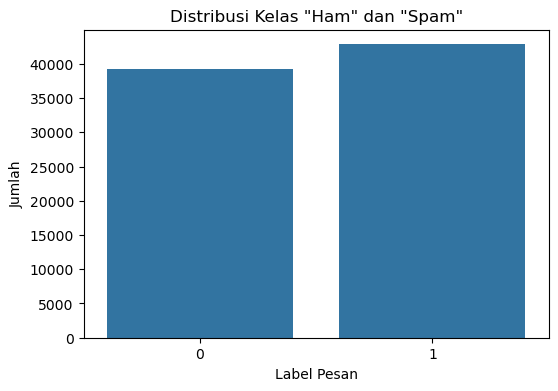


Jumlah pesan per kelas:
label
1    42845
0    39233
Name: count, dtype: int64
Persentase Spam: 52.20%


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title('Distribusi Kelas "Ham" dan "Spam"')
plt.xlabel('Label Pesan')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan persentase secara kuantitatif
label_counts = data['label'].value_counts()
print("\nJumlah pesan per kelas:")
print(label_counts)
# Hitungan total pesan
total_messages = label_counts.sum()

# Hitungan pesan Spam (menggunakan kunci 1)
spam_count = label_counts[1]

print(f"Persentase Spam: {(spam_count / total_messages) * 100:.2f}%")

Panjang string Ham (0): 60525003
Panjang string Spam (1): 45530469


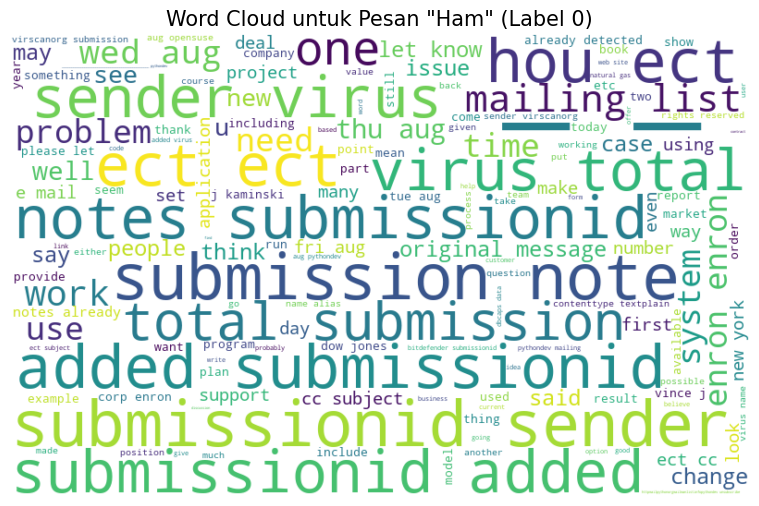

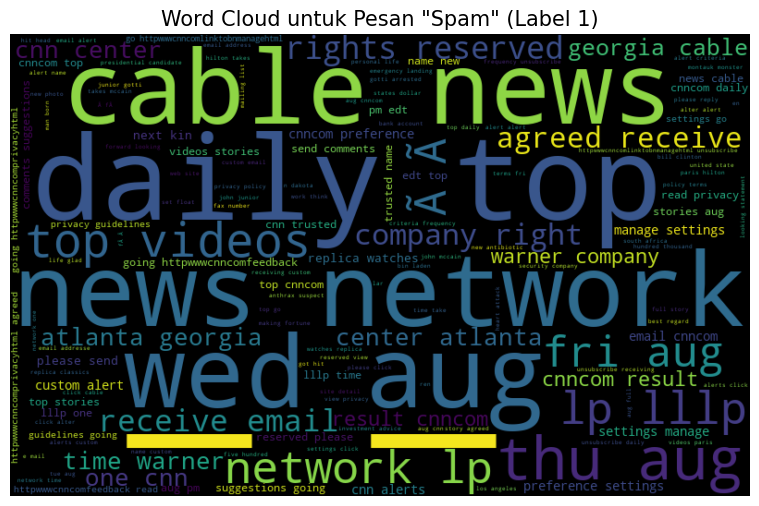

In [83]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menggabungkan semua teks 'ham' (0) dan 'spam' (1)
# Menggunakan nilai numerik [0] untuk 'ham' dan [1] untuk 'spam'
ham_words = ' '.join(list(data[data['label'] == 0]['text_combined']))
spam_words = ' '.join(list(data[data['label'] == 1]['text_combined']))

# Cek kembali untuk validasi
print(f"Panjang string Ham (0): {len(ham_words)}")
print(f"Panjang string Spam (1): {len(spam_words)}")

if len(ham_words) == 0 or len(spam_words) == 0:
    print("\n⚠️ Peringatan: Teks masih kosong. Mohon cek kolom 'text_combined' atau proses Label Encoding Anda.")
else:
    # --- Word Cloud untuk HAM (Label 0) ---
    wordcloud_ham = WordCloud(width=800, height=500, background_color='white', max_words=150).generate(ham_words)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_ham, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud untuk Pesan "Ham" (Label 0)', fontsize=15)
    plt.show()

    # --- Word Cloud untuk SPAM (Label 1) ---
    wordcloud_spam = WordCloud(width=800, height=500, background_color='black', max_words=150).generate(spam_words)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud untuk Pesan "Spam" (Label 1)', color='black', fontsize=15)
    plt.show()

## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

#### 1. Tokenisasi 
#### 2. Lemmatization
#### 3. Stemming
#### 4. Stopword removal (Tanda baca, angka dan kata)
#### 5. Text Normalisasi

In [ ]:
# Inisialisasi stop words dan stemmer/lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 5. Normalisasi Teks (Lowercasing)
    text = text.lower()
    
    # 4. Stopword Removal (Tanda baca, angka) & Menghapus URL, dll.
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Hapus URL
    text = re.sub(r'\d+', '', text) # Hapus angka
    text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca (punctuation)
    
    # 1. Tokenisasi
    tokens = word_tokenize(text)
    
    # 4. Stopword Removal (Kata)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1] # Hapus kata pendek

    # 2. Lemmatization (Mengubah kata ke bentuk dasar)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

# Terapkan fungsi preprocessing ke kolom teks
data['processed_text'] = data['text_combined'].apply(preprocess_text)

print("Teks setelah Text processing:")
print(data[['text_combined', 'processed_text']].head())

Teks setelah Preprocessing:
                                       text_combined  \
0  hpl nom may 25 2001 see attached file hplno 52...   
1  nom actual vols 24 th forwarded sabrae zajac h...   
2  enron actuals march 30 april 1 201 estimated a...   
3  hpl nom may 30 2001 see attached file hplno 53...   
4  hpl nom june 1 2001 see attached file hplno 60...   

                                      processed_text  
0    hpl nom may see attached file hplno xl hplno xl  
1  nom actual vols th forwarded sabrae zajac hou ...  
2  enron actuals march april estimated actuals ma...  
3    hpl nom may see attached file hplno xl hplno xl  
4   hpl nom june see attached file hplno xl hplno xl  


#### 5. Labeling Data 

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon') # Pastikan sudah diunduh

sid = SentimentIntensityAnalyzer()

# Definisikan Fungsi untuk Mendapatkan Sentimen VADER
def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    # Gunakan skor 'compound' (komposit) untuk menentukan sentimen
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Terapkan Labeling pada teks bersih
df['Sentiment'] = df['Cleaned_Text'].apply(get_vader_sentiment)
df['Polarity_Score'] = df['Statement'].apply(lambda x: sid.polarity_scores(x)['compound']) # Menggunakan teks asli untuk skor yang lebih baik

print("\nContoh hasil Labeling Sentimen:")
print(df[['Statement', 'Sentiment', 'Polarity_Score']].head())


Contoh hasil Labeling Sentimen:
                                           Statement Sentiment  Polarity_Score
0                         <NAME>CHAIR POWELL</NAME>.   Neutral          0.0000
1                                    Good afternoon.  Positive          0.4404
2  At the Federal Reserve, we are strongly commit...  Positive          0.4939
3  Since the beginning of the pandemic, we have t...  Positive          0.7003
4  Today my colleagues on the Federal Open Market...  Positive          0.5859


#### 6. Text Vektorisasi

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
# max_features membatasi jumlah fitur (kata unik) untuk mengurangi kompleksitas
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Target variabel sudah numerik (0 dan 1)
X = tfidf_vectorizer.fit_transform(data['processed_text'])
y = data['label'] # Kolom label numerik Anda

print(f"Dimensi Matriks Fitur (X) setelah Vektorisasi: {X.shape}")

Dimensi Matriks Fitur (X) setelah Vektorisasi: (82078, 5000)


#### 7. Data Splitting

In [86]:
from sklearn.model_selection import train_test_split

# Pembagian data 80% Training dan 20% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20, # 20% untuk pengujian
    random_state=42, # Untuk hasil yang konsisten
    stratify=y       # Memastikan rasio 'ham'/'spam' di train dan test sama
)

print(f"Jumlah data Training (80%): {X_train.shape[0]} baris")
print(f"Jumlah data Testing (20%): {X_test.shape[0]} baris")

Jumlah data Training (80%): 65662 baris
Jumlah data Testing (20%): 16416 baris


## Data Modeling

In [3]:
# Berikan Penjelasan tentang model yang dipilih

#### Penjelasan Model

Model yang digunakan adalah Support Vector Machine (SVM), dimana algoritma ini merupakan pembelajaran terawasi (supervised learning) yang sangat efektif untuk tugas klasifikasi dan regresi, terutama dalam ruang fitur berdimensi tinggi, seperti data teks yang divetorisasi menggunakan TF-IDF.

##### 1. Konsep Dasar: Hyperplane dan Margin 
Tujuan utama SVM adalah menemukan hyperplane (bidang pemisah) terbaik yang membagi kelas-kelas data (Positif, Negatif, Netral) dalam ruang $N$-dimensi.Hyperplane: Batas keputusan yang memisahkan titik data dari kelas yang berbeda.Margin: Jarak antara hyperplane dan titik data terdekat dari setiap kelas. Titik data terdekat ini disebut Support Vectors.Optimal Hyperplane: SVM mencari hyperplane yang memiliki margin terbesar. Margin yang besar memberikan batas keputusan yang lebih kokoh dan membantu model memiliki kemampuan generalisasi yang lebih baik ke data baru.

##### 2. Penerapan SVM pada Data Teks (TF-IDF)

Dalam proyek Anda, data input ke SVM adalah matriks numerik yang dihasilkan dari TF-IDF Vectorization 
($X_{\text{train}}$ dan $X_{\text{test}}$).Fitur: Setiap dimensi (kolom) dalam matriks TF-IDF merepresentasikan bobot pentingnya suatu kata dalam kalimat (fitur). Karena TF-IDF biasanya menghasilkan ribuan fitur (kata unik), data Anda berada dalam ruang berdimensi tinggi.Proses: SVM menggunakan bobot-bobot TF-IDF ini untuk menentukan bagaimana setiap kalimat (data point) ditempatkan di ruang fitur. Kemudian, ia menemukan hyperplane optimal yang memisahkan kalimat-kalimat yang memiliki sentimen berbeda (misalnya, memisahkan kalimat "Netral" dari "Positif").

##### 3. Kernel Trick (Penanganan Data Non-Linier)

Salah satu kekuatan terbesar SVM adalah kemampuannya menangani data yang tidak dapat dipisahkan secara linier (data yang tidak bisa dipisah hanya dengan garis lurus atau bidang datar).

Fungsi Kernel: Melalui teknik yang disebut Kernel Trick, SVM secara implisit memetakan data Anda ke ruang berdimensi lebih tinggi. Di ruang baru ini, data non-linier menjadi dapat dipisahkan secara linier.

Pilihan Kernel: Untuk data TF-IDF (yang cenderung sudah cukup linier), kernel Linear seringkali merupakan pilihan yang cepat dan efektif. Namun, kernel seperti Radial Basis Function (RBF) dapat digunakan jika batas pemisahan sentimen ternyata kompleks.

##### 4. SVM

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Konversi matriks sparse TF-IDF menjadi array dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Konversi target label ke numpy array
y_train_np = y_train.values
y_test_np = y_test.values

# Tentukan jumlah fitur
input_dim = X_train_dense.shape[1]

In [89]:
## 🏗️ Definisi Model Deep Learning (MLP)
model = Sequential()

# Layer Input/Hidden 1
model.add(Dense(units=512, activation='relu', input_dim=input_dim))
model.add(Dropout(0.5))

# Layer Hidden 2
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))

# Layer Output
# units=1 karena ini klasifikasi biner, activation='sigmoid' untuk output probabilitas antara 0 dan 1
model.add(Dense(units=1, activation='sigmoid'))

# Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Loss function standar untuk klasifikasi biner
              metrics=['accuracy'])

model.summary()

c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,692,097 (10.27 MB)

 Trainable params: 2,692,097 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Pelatihan Model
history = model.fit(
    X_train_dense,
    y_train_np,
    epochs=10,        # Jumlah iterasi pelatihan
    batch_size=32,    # Ukuran sampel per update gradien
    validation_data=(X_test_dense, y_test_np),
    verbose=1
)

Epoch 1/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 181s 83ms/step - accuracy: 0.9753 - loss: 0.0694 - val_accuracy: 0.9828 - val_loss: 0.0463
Epoch 2/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 164s 80ms/step - accuracy: 0.9913 - loss: 0.0264 - val_accuracy: 0.9853 - val_loss: 0.0414
Epoch 3/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 164s 80ms/step - accuracy: 0.9958 - loss: 0.0134 - val_accuracy: 0.9861 - val_loss: 0.0493
Epoch 4/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 207s 82ms/step - accuracy: 0.9981 - loss: 0.0060 - val_accuracy: 0.9862 - val_loss: 0.0525
Epoch 5/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 202s 82ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9868 - val_loss: 0.0630
Epoch 6/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 210s 102ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9870 - val_loss: 0.0618
Epoch 7/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 183s 89ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9868 - val_loss: 0.0661
Epoch 8/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 219s 98ms/step - accuracy:

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Prediksi pada data uji
y_pred_proba = model.predict(X_test_dense)
# Konversi probabilitas (0-1) menjadi kelas biner (0 atau 1)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Evaluasi
loss, accuracy = model.evaluate(X_test_dense, y_test_np, verbose=0)
print(f"Loss pada data testing: {loss:.4f}")
print(f"Accuracy pada data testing: {accuracy*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_np, y_pred))

513/513 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
Loss pada data testing: 0.0687
Accuracy pada data testing: 98.79%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7847
           1       0.99      0.99      0.99      8569

    accuracy                           0.99     16416
   macro avg       0.99      0.99      0.99     16416
weighted avg       0.99      0.99      0.99     16416


Confusion Matrix:
[[7751   96]
 [ 102 8467]]


## Perbandingan Kinerja Mode

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Data Input: X_train dan X_test (menggunakan format Sparse Matrix TF-IDF)

# --- A. Multinomial Naive Bayes (MNB) ---
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
y_pred_mnb = mnb_model.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

# --- B. Support Vector Machine (LinearSVC) ---
# LinearSVC adalah implementasi SVM yang cepat untuk klasifikasi linear pada data besar/sparse
svm_model = LinearSVC(random_state=42, dual=False)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# --- C. Deep Learning (MLP) ---
# Asumsikan Anda sudah mendapatkan akurasi dari model Deep Learning
# Ganti nilai ini dengan hasil evaluasi model MLP Anda
accuracy_mlp = 0.985 # Contoh nilai akurasi MLP (98.50%)

In [93]:
# Kumpulkan hasil akurasi
results = pd.DataFrame({
    'Model': ['MLP Deep Learning', 'Multinomial Naive Bayes', 'Linear SVM'],
    'Accuracy': [accuracy_mlp, accuracy_mnb, accuracy_svm]
})

# Urutkan berdasarkan Accuracy
results = results.sort_values(by='Accuracy', ascending=False)
print("Tabel Perbandingan Kinerja Model:")
print(results)

Tabel Perbandingan Kinerja Model:
                     Model  Accuracy
0        MLP Deep Learning  0.985000
2               Linear SVM  0.983370
1  Multinomial Naive Bayes  0.960404


C:\Users\Dede Ahmad Maolana\AppData\Local\Temp\ipykernel_17336\1771017246.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results, palette='viridis')


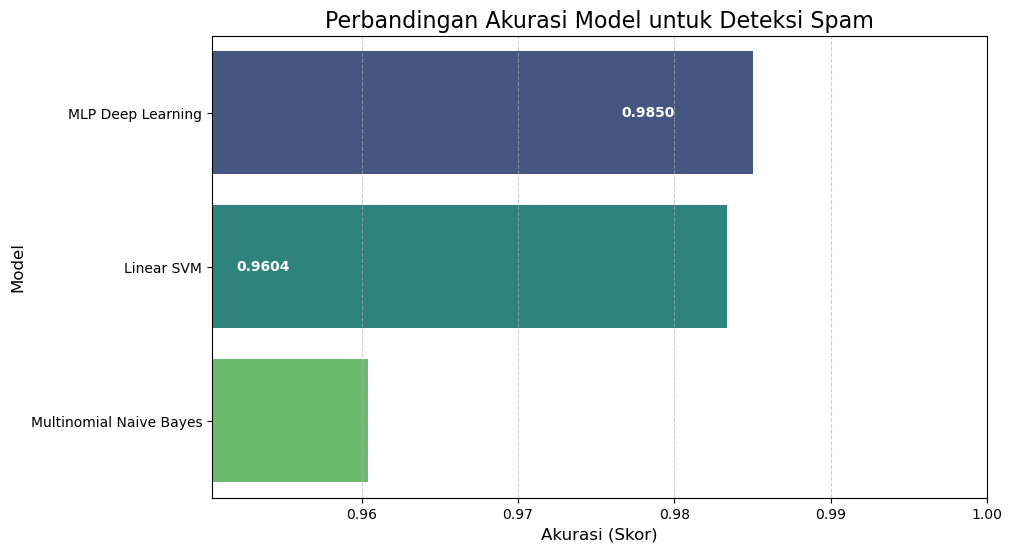

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results, palette='viridis')

# Tambahkan nilai akurasi di samping bar
for index, row in results.iterrows():
    plt.text(row['Accuracy'] - 0.005, index, f'{row["Accuracy"]:.4f}', 
             color='white', ha="right", va="center", weight='bold')

plt.xlim(min(results['Accuracy']) - 0.01, 1.0) # Sesuaikan batas x agar nilai akurasi terlihat jelas
plt.title('Perbandingan Akurasi Model untuk Deteksi Spam', fontsize=16)
plt.xlabel('Akurasi (Skor)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()